In [70]:
import pandas as pd
import numpy as np
from os import path, getcwd

In [79]:
dataset_path = "../data/as_tom/annotations-all_short.csv"


In [80]:
df = pd.read_csv(dataset_path)

In [81]:
df.head(5)


,AO.MG,AV structure,AVA vti,AoPG,Rhythm,Risk factors,VPeak,as_label,date,delta_x,...,MVA,MVMG,Procedure Performed,Pt ID #,ROOT,RV function,Bicuspid,Sclerotic,AVA vit pixel,LVOT_plax
0,10.0,sclerotic,1.684878,21,Sinus Rhythm,Never smoked\r\nHigh BP\r\nDiabetes\r\nHigh Ch...,2.291288,mild,6/9/2010,0.119531,...,NaN,NaN,MMode/2D\r\nDoppler,93989,20,Normal RV function.,False,True,117.925475,20
1,16.0,sclerotic,1.899700,29,Atrial Fibrillation,NaN,2.692582,mild,10/11/2011,0.101233,...,NaN,NaN,MMode/2D\r\nDoppler\r\nPortable,106032,22,Normal RV function.,False,True,185.369493,22
2,8.9,sclerotic,1.557832,18,Sinus Bradycardia,NaN,2.121320,mild,6/7/2012,0.138725,...,NaN,NaN,MMode/2D\r\nDoppler,111959,21,Normal RV function.,False,True,80.949274,21
3,12.0,sclerotic,1.503929,21,Ventricular Premature Beats\r\nLBBB\r\nSinus R...,Quit more than 5 years ago\r\nHigh Cholesterol...,2.291288,normal,7/23/2012,0.117763,...,NaN,NaN,MMode/2D\r\nDoppler,112999,22,Normal RV function.,False,True,108.445157,22
4,15.0,sclerotic,1.608765,28,Sinus Rhythm,Smoker \r\nHigh BP,2.645751,mild,2/23/2015,0.093349,...,NaN,NaN,MMode/2D\r\nDoppler,136867,20,Normal RV function.,False,True,184.617036,20


In [82]:
df.columns

Index(['AO.MG', 'AV structure', 'AVA vti', 'AoPG', 'Rhythm', 'Risk factors',
       'VPeak', 'as_label', 'date', 'delta_x', 'delta_y', 'frame_time',
       'frames', 'heart_rate', 'lvot_diameter', 'machine', 'path',
       'patient_id', 'predicted_view_quality', 'raw_data_path', 'split',
       'predicted_view_probability', 'view', 'Hosp#', 'age', 'Aorta',
       'Aortic Regurgitation', 'AV function', 'AV stenosis severity', 'AVA',
       'AVA indexed', 'AVA vel', 'BSA', 'Conclusions', 'Date of last study',
       'Date of study', 'Echo ID#', 'Indication', 'LA', 'LV', 'LV grade',
       'LVMass', 'LVMass indexed', 'LVOV', 'LVs', 'Mitral Regurgitation',
       'MV function', 'MV structure', 'MVA', 'MVMG', 'Procedure Performed',
       'Pt ID #', 'ROOT', 'RV function', 'Bicuspid', 'Sclerotic',
       'AVA vit pixel', 'LVOT_plax'],
      dtype='object')

In [83]:
metadata = df.drop("AO.MG", axis=1)
metadata = metadata.drop("AVA vti", axis=1)
metadata = metadata.drop("VPeak", axis=1)
metadata = metadata.drop("as_label", axis=1)
metadata = metadata.drop("split", axis=1)
metadata = metadata.drop("view", axis=1)
metadata = metadata.drop("machine", axis=1)
metadata = metadata.drop("raw_data_path", axis=1)
metadata = metadata.drop("path", axis=1)
metadata = metadata.drop("patient_id", axis=1)
metadata = metadata.drop("Hosp#", axis=1)
metadata = metadata.drop("Date of last study", axis=1)
metadata = metadata.drop("AVA", axis=1)
metadata = metadata.drop("AVA indexed", axis=1)
metadata = metadata.drop("AVA vel", axis=1)
metadata = metadata.drop("AV stenosis severity", axis=1)
metadata = metadata.drop("Date of study", axis=1)
metadata = metadata.drop("Echo ID#", axis=1)
metadata = metadata.drop("Pt ID #", axis=1)
metadata = metadata.drop("Procedure Performed", axis=1)
metadata = metadata.drop("AVA vit pixel", axis=1)
metadata = metadata.drop("MVA", axis=1)
metadata = metadata.drop("MVMG", axis=1)
metadata = metadata.drop("Risk factors", axis=1)

In [84]:
metadata.head(5)


,AV structure,AoPG,Rhythm,date,delta_x,delta_y,frame_time,frames,heart_rate,lvot_diameter,...,LVOV,LVs,Mitral Regurgitation,MV function,MV structure,ROOT,RV function,Bicuspid,Sclerotic,LVOT_plax
0,sclerotic,21,Sinus Rhythm,6/9/2010,0.119531,0.119531,34.098539,28,68,20,...,1.300,24,Trivial,normal opening,normal,20,Normal RV function.,False,True,20
1,sclerotic,29,Atrial Fibrillation,10/11/2011,0.101233,0.101233,33.399999,31,71,22,...,1.300,19,Trivial,normal opening,normal,22,Normal RV function.,False,True,22
2,sclerotic,18,Sinus Bradycardia,6/7/2012,0.138725,0.138725,33.428570,36,56,21,...,0.800,38,Trivial,normal opening,normal,21,Normal RV function.,False,True,21
3,sclerotic,21,Ventricular Premature Beats\r\nLBBB\r\nSinus R...,7/23/2012,0.117763,0.117763,33.619046,22,89,22,...,1.000,27,Trivial,normal opening,normal,22,Normal RV function.,False,True,22
4,sclerotic,28,Sinus Rhythm,2/23/2015,0.093349,0.093349,19.053030,45,78,20,...,1.164,20,Mild,normal opening,mild thickening,20,Normal RV function.,False,True,20


In [85]:
metadata.columns



Index(['AV structure', 'AoPG', 'Rhythm', 'date', 'delta_x', 'delta_y',
       'frame_time', 'frames', 'heart_rate', 'lvot_diameter',
       'predicted_view_quality', 'predicted_view_probability', 'age', 'Aorta',
       'Aortic Regurgitation', 'AV function', 'BSA', 'Conclusions',
       'Indication', 'LA', 'LV', 'LV grade', 'LVMass', 'LVMass indexed',
       'LVOV', 'LVs', 'Mitral Regurgitation', 'MV function', 'MV structure',
       'ROOT', 'RV function', 'Bicuspid', 'Sclerotic', 'LVOT_plax'],
      dtype='object')

### Additional Metadata columns to drop 
| Column Name | dtype | Drop | Comment |
| ----------- | ----- | ---- | ------  |
AV structure                |   object |       N|       |           
AoPG                        |    int64 |       N|       |           
Rhythm                      |   object |       N|       |           
*date*                        |   object |       **Y**|       |           
*delta_x*                     |  float64 |       **Y**|       |              
*delta_y*                     |  float64 |       **Y**|       |           
*frame_time*                  |  float64 |       **Y**|       |           
*frames*                      |    int64 |       **Y**|       |           
heart_rate                  |    int64 |       N|       |           
lvot_diameter               |    int64 |       N|       |           
*predicted_view_quality*      |  float64 |       **Y**|       |           
*predicted_view_probability*  |  float64 |       **Y**|       |           
age                         |    int64 |       N|       |           
Aorta                       |   object |       N|       |           
Aortic Regurgitation        |   object |       N|       |           
*AV function*                 |   object |       **M**|       |           
BSA                         |  float64 |       N|       |           
*Conclusions*                 |   object |       **Y**|       |           
Indication                  |   object |       N|       |           
LA                          |    int64 |       N|       |           
LV                          |   object |       **Y**|Ugly data       |                
LV grade                    |  float64 |       N|       |           
LVMass                      |  float64 |       N|       |           
*LVMass indexed*              |  float64 |       **M**|       |           
LVOV                        |  float64 |       N|       |           
LVs                         |    int64 |       N|       |           
Mitral Regurgitation        |   object |       N|       |           
MV function                 |   object |       N|       |           
MV structure                |   object |       N|       |           
ROOT                        |    int64 |       **M**| Not sure what this is      |                
RV function                 |   object |       N|       |           
Bicuspid                    |     bool |       N|       |           
Sclerotic                   |     bool |       N|       |           
*LVOT_plax*                   |    int64 |       **M**|       |               

In [86]:
# Based on Michael and Neda's findings, looks like we need the following 
# columns:
#   AVStructure
#   MVStructure
#   Bicuspid
#   LA
#   BAV
drop_col = ["AO.MG", "AVA vti", "VPeak", "as_label", "split", "view", "machine", "raw_data_path", 
            "path", "patient_id", "Hosp#", "Date of last study", "AVA", "AVA indexed", "AVA vel", 
            "AV stenosis severity", "Date of study", "Echo ID#", "Pt ID #", "Procedure Performed", 
            "AVA vit pixel", "MVA", "MVMG", "Risk factors", "date","delta_x","delta_y","frame_time",
            "frames","predicted_view_quality","predicted_view_probability", "AV function","Conclusions",
            "LVMass indexed","ROOT","LVOT_plax"]
metadata = df.drop(drop_col, axis=1)

In [87]:
metadata.columns

Index(['AV structure', 'AoPG', 'Rhythm', 'heart_rate', 'lvot_diameter', 'age',
       'Aorta', 'Aortic Regurgitation', 'BSA', 'Indication', 'LA', 'LV',
       'LV grade', 'LVMass', 'LVOV', 'LVs', 'Mitral Regurgitation',
       'MV function', 'MV structure', 'RV function', 'Bicuspid', 'Sclerotic'],
      dtype='object')

In [88]:
# Remove the \r \n stufff
metadata = metadata.applymap(lambda x: x.replace('\r', ',').replace('\n', ',').replace(',,', ', ') if isinstance(x, str) else x)

In [89]:
metadata.head(5)

,AV structure,AoPG,Rhythm,heart_rate,lvot_diameter,age,Aorta,Aortic Regurgitation,BSA,Indication,...,LV grade,LVMass,LVOV,LVs,Mitral Regurgitation,MV function,MV structure,RV function,Bicuspid,Sclerotic
0,sclerotic,21,Sinus Rhythm,68,20,70,NaN,None,1.87,arrhythmia's/abn ECG,...,1.0,130.64523,1.300,24,Trivial,normal opening,normal,Normal RV function.,False,True
1,sclerotic,29,Atrial Fibrillation,71,22,85,Aneurysm:,Mild-mod*,2.03,aortic valve disease,...,1.0,147.25768,1.300,19,Trivial,normal opening,normal,Normal RV function.,False,True
2,sclerotic,18,Sinus Bradycardia,56,21,67,NaN,Trivial,1.90,none given,...,1.5,161.72209,0.800,38,Trivial,normal opening,normal,Normal RV function.,False,True
3,sclerotic,21,"Ventricular Premature Beats, LBBB, Sinus Rhythm",89,22,81,NaN,Trivial,1.91,stroke/embolus,...,1.0,126.76000,1.000,27,Trivial,normal opening,normal,Normal RV function.,False,True
4,sclerotic,28,Sinus Rhythm,78,20,71,NaN,None,1.95,"LV function, RV function",...,NaN,160.97509,1.164,20,Mild,normal opening,mild thickening,Normal RV function.,False,True


# Let's deal with a smaller set of metadata


In [47]:
import pandas as pd 

dataset_path = "../data/as_tom/annotations-all_short.csv"
df = pd.read_csv(dataset_path)
df = df.applymap(lambda x: x.replace('\r', ',').replace('\n', ',').replace(',,', ' ') if isinstance(x, str) else x)
# metadata = df[["AV structure","MV structure","Bicuspid","LA"]]
metadata = df[["age", "Gender","LA","Bicuspid"]]



In [48]:
metadata.head(5)


,AV structure,MV structure,Bicuspid,LA
0,sclerotic,normal,False,33
1,sclerotic,normal,False,31
2,sclerotic,normal,False,38
3,sclerotic,normal,False,40
4,sclerotic,mild thickening,False,30


In [49]:
metadata.nunique()


AV structure     6
MV structure     3
Bicuspid         2
LA              20
dtype: int64

In [50]:
metadata.dtypes

AV structure    object
MV structure    object
Bicuspid          bool
LA               int64
dtype: object

In [51]:
metadata = pd.get_dummies(metadata, columns=["AV structure","MV structure","Bicuspid"])

In [52]:
metadata.head()


,LA,AV structure_Trileaflet sclerotic,AV structure_bicuspid,AV structure_bicuspid sclerotic,AV structure_calcified,AV structure_sclerotic,AV structure_sclerotic Trileaflet,MV structure_mild thickening,MV structure_normal,MV structure_rheumatic,Bicuspid_False,Bicuspid_True
0,33,0,0,0,0,1,0,0,1,0,1,0
1,31,0,0,0,0,1,0,0,1,0,1,0
2,38,0,0,0,0,1,0,0,1,0,1,0
3,40,0,0,0,0,1,0,0,1,0,1,0
4,30,0,0,0,0,1,0,1,0,0,1,0


### Generate the point cloud

In [53]:
import torch
metadata_pc = torch.tensor(metadata.values, dtype=torch.float32)[:1, :]
n, m = metadata_pc.shape
print(n,m)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


1 12


In [54]:
# !pip install torch_geometric

In [55]:
from torch_geometric.data import  Data
metadata_pc_obj = Data(pos=metadata_pc.unsqueeze(1).expand(-1,3,-1).to(device=device))
# Generate edge indices for a fully connected graph
edge_index = torch.combinations(torch.arange(n), with_replacement=True).T
edge_index = edge_index[:, edge_index[0] != edge_index[1]]
edge_index = edge_index.to(device=device)   
print(edge_index)
print(metadata_pc.unsqueeze(1).expand(-1,3,-1).shape)

tensor([], device='cuda:0', size=(2, 0), dtype=torch.int64)
torch.Size([1, 3, 12])


In [44]:
print(m)

12


In [46]:
# Apply the point transformer to get some embeddings
from torch_geometric.nn import PointTransformerConv, MLP
from torch_geometric.nn import PointNetConv

num_input_features = m
num_output_features = m

local_nn = MLP([m, 64, m])
global_nn = MLP([m, 64, m])
point_transformer = PointNetConv(local_nn=local_nn, global_nn=global_nn, add_self_loops=True)

point_transformer = point_transformer.to(device)
# Since we are working with higher dimensional data, we should specify a pos_nn with proper dimensions

embeddings = point_transformer(x=torch.ones(n,3,m).to(device=device), pos=metadata_pc_obj.pos, edge_index=edge_index,)

print(embeddings.shape)
print(embeddings)


RuntimeError: running_mean should contain 2 elements not 64

#### What Masoud did with his graph creation


In [6]:
import pandas as pd
import networkx as nx


dataset_path = "../data/as_tom/annotations-all.csv"
df = pd.read_csv(dataset_path)
metadata = df
df = df.applymap(lambda x: x.replace('\r', ',').replace('\n', ',').replace(',,', ' ') if isinstance(x, str) else x)
metadata = pd.get_dummies(metadata, columns=["AV structure","MV structure","Bicuspid"])



In [7]:
metadata.head()

,AO.MG,AVA vti,AoPG,Rhythm,Risk factors,VPeak,as_label,date,delta_x,delta_y,...,MV structure_normal,MV structure_post-inflamm,MV structure_prosthetic-bio,MV structure_prosthetic-mech,MV structure_rheumatic,MV structure_sclerotic,MV structure_severe thickening,MV structure_thickened,Bicuspid_False,Bicuspid_True
0,10.0,1.684878,21.0,Sinus Rhythm,Never smoked\r\nHigh BP\r\nDiabetes\r\nHigh Ch...,2.291288,mild,2010-06-09,0.119531,0.119531,...,1,0,0,0,0,0,0,0,1,0
1,16.0,1.899700,29.0,Atrial Fibrillation,NaN,2.692582,mild,2011-10-11,0.101233,0.101233,...,1,0,0,0,0,0,0,0,1,0
2,8.9,1.557833,18.0,Sinus Bradycardia,NaN,2.121320,mild,2012-06-07,0.138725,0.138725,...,1,0,0,0,0,0,0,0,1,0
3,12.0,1.503929,21.0,Ventricular Premature Beats\r\nLBBB\r\nSinus R...,Quit more than 5 years ago\r\nHigh Cholesterol...,2.291288,normal,2012-07-23,0.117763,0.117763,...,1,0,0,0,0,0,0,0,1,0
4,15.0,1.608765,28.0,Sinus Rhythm,Smoker \r\nHigh BP,2.645751,mild,2015-02-23,0.093349,0.093349,...,0,0,0,0,0,0,0,0,1,0


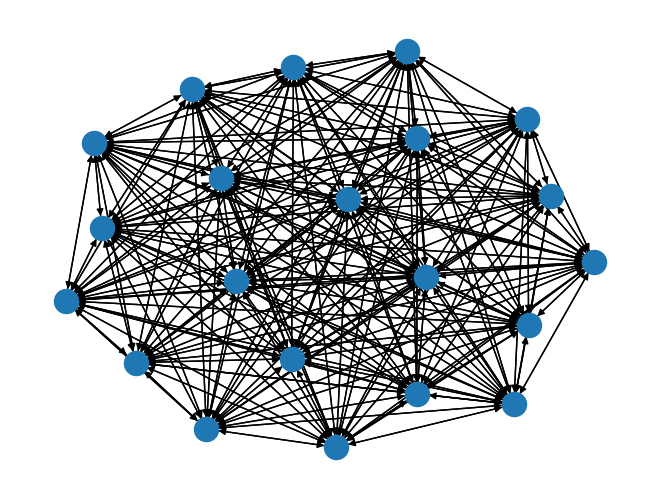

In [42]:
g = nx.complete_graph(metadata.shape[0]//2, create_using=nx.DiGraph())

nx.draw(g, with_labels=False)


# Add the Gender and the LA Indexed to as_tom


In [31]:
import pandas as pd

filemaker_path = "../data/as_tom/Downloaded_Filemaker_Studies.csv"
dataset_path = "../data/as_tom/annotations-all.csv"

df = pd.read_csv(dataset_path)
filemaker_df = pd.read_csv(filemaker_path)


# df = df.applymap(lambda x: x.replace('\r', ',').replace('\n', ',').replace(',,', ' ') if isinstance(x, str) else x)
# metadata = pd.get_dummies(metadata, columns=["AV structure","MV structure","Bicuspid"])


C:\Users\nimako\AppData\Local\Temp\ipykernel_24144\1855377333.py:7: DtypeWarning: Columns (56,57,152,172,211,246,278,297,323,328,343,344,345,346,347,348,349,350,351,377,379,381,383,393,397,419,420,423,424) have mixed types. Specify dtype option on import or set low_memory=False.
  filemaker_df = pd.read_csv(filemaker_path)


In [32]:
print(filemaker_df.shape, df.shape)

(17654, 434) (9297, 58)


In [33]:
# "Echo ID#" in filemaker_df.columns
"LA vol indexed" in filemaker_df.columns


True

In [34]:
df_merged = pd.merge(df, filemaker_df[['Echo ID#', 'Gender', 'LA vol indexed']], on='Echo ID#', how='left')

In [35]:
print(df_merged.shape)


(9297, 60)


In [36]:
df = df_merged
df.shape


(9297, 60)

In [37]:
df = df_merged[["patient_id", "date", "AV structure","MV structure","Bicuspid", "LA", "age"]]
metadata = pd.get_dummies(df, columns=["AV structure","MV structure","Bicuspid"])


In [38]:
metadata.shape
metadata.to_csv("../data/as_tom/annotations-all_meta.csv")

# New Attempt

In [119]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler

sc_scaler = StandardScaler()

dataset_path = "../data/as_tom/annotations-all.csv"
filemaker_path = "../data/as_tom/Downloaded_Filemaker_Studies.csv"
df = pd.read_csv(dataset_path)
filemaker_df = pd.read_csv(filemaker_path)
# df = df.applymap(lambda x: x.replace('\r', ',').replace('\n', ',').replace(',,', ' ') if isinstance(x, str) else x)
# metadata = df[["AV structure","MV structure","Bicuspid","LA"]]
df_merged = pd.merge(df, filemaker_df[['Echo ID#', 'Gender', 'LA vol indexed']], on='Echo ID#', how='left')
metadata = df_merged[["patient_id","date", "age", "Gender","LA","Bicuspid"]]
metadata_pc = pd.get_dummies(metadata, columns=["Gender","Bicuspid"])
# Standardize all the data
metadata_pc[metadata_pc.columns[2:]] = sc_scaler.fit_transform(metadata_pc[metadata_pc.columns[2:]])
# add the patient id back in


C:\Users\nimako\AppData\Local\Temp\ipykernel_17728\1841118399.py:9: DtypeWarning: Columns (56,57,152,172,211,246,278,297,323,328,343,344,345,346,347,348,349,350,351,377,379,381,383,393,397,419,420,423,424) have mixed types. Specify dtype option on import or set low_memory=False.
  filemaker_df = pd.read_csv(filemaker_path)


In [120]:
metadata_pc.head()


,patient_id,date,age,LA,Gender_F,Gender_M,Bicuspid_False,Bicuspid_True
0,3196350,6/9/2010,0.566229,-0.562952,1.182627,-1.150761,0.351239,-0.351239
1,3483316,10/11/2011,1.295429,-0.868176,-0.845575,0.868990,0.351239,-0.351239
2,1675609,6/7/2012,0.420390,0.200107,-0.845575,0.868990,0.351239,-0.351239
3,3629675,7/23/2012,1.100975,0.505331,-0.845575,0.868990,0.351239,-0.351239
4,3923043,2/23/2015,0.614843,-1.020788,-0.845575,0.868990,0.351239,-0.351239


### Symmetry Breaking 


In [122]:
# Add i to each column to avoid symmetry 
# Skipping the patient id and date columns
nums_to_add = [i-2 for i in range(2, metadata_pc.shape[1])]
cols_to_add = metadata_pc.columns[2:]
metadata_pc[cols_to_add] = metadata_pc[cols_to_add].add(nums_to_add, axis=1)
metadata_pc.head(10)

,patient_id,date,age,LA,Gender_F,Gender_M,Bicuspid_False,Bicuspid_True
0,3196350,6/9/2010,0.566229,0.437048,3.182627,1.849239,4.351239,4.648761
1,3483316,10/11/2011,1.295429,0.131824,1.154425,3.868990,4.351239,4.648761
2,1675609,6/7/2012,0.420390,1.200107,1.154425,3.868990,4.351239,4.648761
3,3629675,7/23/2012,1.100975,1.505331,1.154425,3.868990,4.351239,4.648761
4,3923043,2/23/2015,0.614843,-0.020788,1.154425,3.868990,4.351239,4.648761
5,1360475,3/9/2015,0.712069,-0.478624,3.182627,1.849239,4.351239,4.648761
6,3420268,6/19/2015,0.663456,1.047495,1.154425,3.868990,4.351239,4.648761
7,2305143,9/10/2015,1.246815,1.963167,1.154425,3.868990,4.351239,4.648761
8,2477234,10/7/2015,0.955136,1.657943,1.154425,3.868990,4.351239,4.648761
9,1277493,11/23/2015,0.712069,2.268391,1.154425,3.868990,4.351239,4.648761


In [125]:
# Save the metadata_pc as csv
metadata_pc.to_csv("../data/as_tom/annotations-all_meta.csv", index=False)

In [95]:
metadata_pc.iloc[0].values
point_cloud = torch.tensor(metadata_pc.iloc[0].values, dtype=torch.float32).to(device="cuda")
point_cloud = point_cloud.repeat(len(point_cloud), 1)
print(point_cloud)
print(len(point_cloud))
for i in range(len(point_cloud)):
    # print(point_cloud[i,i])
    point_cloud[i, i] = 0
    # print(point_cloud)

print(point_cloud)


tensor([[0.5662, 0.4370, 3.1826, 1.8492, 4.3512, 4.6488],
        [0.5662, 0.4370, 3.1826, 1.8492, 4.3512, 4.6488],
        [0.5662, 0.4370, 3.1826, 1.8492, 4.3512, 4.6488],
        [0.5662, 0.4370, 3.1826, 1.8492, 4.3512, 4.6488],
        [0.5662, 0.4370, 3.1826, 1.8492, 4.3512, 4.6488],
        [0.5662, 0.4370, 3.1826, 1.8492, 4.3512, 4.6488]], device='cuda:0')
6
tensor([[0.0000, 0.4370, 3.1826, 1.8492, 4.3512, 4.6488],
        [0.5662, 0.0000, 3.1826, 1.8492, 4.3512, 4.6488],
        [0.5662, 0.4370, 0.0000, 1.8492, 4.3512, 4.6488],
        [0.5662, 0.4370, 3.1826, 0.0000, 4.3512, 4.6488],
        [0.5662, 0.4370, 3.1826, 1.8492, 0.0000, 4.6488],
        [0.5662, 0.4370, 3.1826, 1.8492, 4.3512, 0.0000]], device='cuda:0')


In [3]:
# Make a fully connected graph and analyze it with pointtransformerconv
import torch
from torch_geometric.data import  Data
from torch_geometric.nn import MLP, PointTransformerConv, global_mean_pool, knn
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


metadata_pc = torch.tensor(metadata_pc.values, dtype=torch.float32)
metadata_pc_obj = Data(pos=metadata_pc.to(device=device),)
# Generate edge indices for a fully connected graph
edge_index = torch.combinations(torch.arange(len(metadata_pc)), with_replacement=True).T
edge_index = edge_index[:, edge_index[0] != edge_index[1]]
edge_index = edge_index.to(device=device)   
print(edge_index)

tensor([[   0,    0,    0,  ..., 9294, 9294, 9295],
        [   1,    2,    3,  ..., 9295, 9296, 9296]], device='cuda:0')


In [4]:
metadata_pc.shape

torch.Size([9297, 6])

In [5]:
# Apply the point transformer to get some embeddings
from torch_geometric.nn import PointTransformerConv, MLP

n, m = metadata_pc.shape

num_input_features = m
num_output_features = m

pos_nn = MLP([m,12,12,m])
point_transformer = PointTransformerConv(num_input_features, num_output_features, pos_nn=pos_nn)

point_transformer = point_transformer.to(device)
# Since we are working with higher dimensional data, we should specify a pos_nn with proper dimensions

embeddings = point_transformer(x=torch.ones(n,m).to(device=device), pos=metadata_pc_obj.pos, edge_index=edge_index)

print(embeddings.shape)
print(embeddings)


OutOfMemoryError: CUDA out of memory. Tried to allocate 990.00 MiB (GPU 0; 6.00 GiB total capacity; 5.17 GiB already allocated; 0 bytes free; 5.18 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF